In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Indira Aline
- **Email:** indiradira63@gmail.com
- **ID Dicoding:** indira_kbs

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda sepanjang season (1:springer, 2:summer, 3:fall, 4:winter)?

- Apakah ada korelasi yang jelas antara suhu dan jumlah penyewa sepeda? Jika ada, apakah korelasinya positif atau negatif?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [37]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Analisis Data**: Kode ini mengindikasikan bahwa Anda sedang melakukan analisis data menggunakan Python dan library Pandas.
- **Sumber Data**: Data yang digunakan berasal dari dua file CSV yang disimpan di Google Drive. File-file ini berisi data yang berhubungan dengan suatu topik "Penyewaan Sepeda".

### Assessing Data

Menilai tabel `day_df`

In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
print("Jumlah duplikasi", day_df.duplicated().sum())

Jumlah duplikasi 0


In [42]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [43]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel `hour_df`

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [46]:
print("Jumlah duplikasi", hour_df.duplicated().sum())

Jumlah duplikasi 0


**Insight:**
- Pada table `day_df`, terdapat 731 baris data. Ada 16 kolom yang masing-masing mewakili variable atau fitur yang berbeda. Setiap kolom memliki tipe data yang spesifik seperti, interger(int64), float(float64), dan objek(object). Semua kolom memiliki 731 nilai non-null, yang berarti tidak ada data yang hilang (missing value) pada DataFrame ini. Dan tidak ada data duplikat.

- Pada table `hour_df`, terdapat 17379 baris data, yang mengindikasikan data dikumpulkan selama hampir 2 tahun (asumsikan 1 tahun = 365 hari * 24 jam = 8760 jam). Sama seperti day_df, ada 16 kolom yang menggambarkan berbagai atribut terkait penggunaan sepeda. Mayoritas kolom bertipe numerik (int64 dan float64), namun ada satu kolom ('dteday') yang bertipe objek, kemungkinan berisi tanggal dalam format string. Semua kolom memiliki 17379 nilai non-null, menunjukkan data yang lengkap dan siap untuk dianalisis dan tidak ada data duplikasi.

Mendeteksi Nilai yang Hilang Dan Duplikasi Pada `day_df`

In [47]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [48]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Mendeteksi Nilai yang Hilang Dan Duplikasi Pada `hour_df`

In [49]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada table day_df dan hour_df semua data lengkap tidak ada missing values maupun data duplikasi

# Cleaning Data

### Teknik untuk Mengatasi Missing Value

In [51]:
# Mengatasi missing values di day_df
# 1. Periksa missing values
missing_day_df = day_df.isnull().sum()

In [52]:
# Mengatasi missing values di hour_df
# 1. Periksa missing values
missing_hour_df = hour_df.isnull().sum()

### Teknik untuk Mengatasi Outlier

In [53]:
def handle_outliers_iqr(df, columns):
    """
    Mengatasi outlier menggunakan metode IQR.

    Args:
        df (pd.DataFrame): DataFrame yang akan diproses.
        columns (list): List kolom numerik yang akan diproses.

    Returns:
        pd.DataFrame: DataFrame dengan outlier yang ditangani.
    """
    df_copy = df.copy()  # Membuat salinan DataFrame untuk menghindari perubahan pada DataFrame asli
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mengganti outlier dengan nilai batas atas atau bawah
        df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
        df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])

    return df_copy # Adjust indentation to align with the for loop

In [54]:
# Tentukan kolom numerik yang ingin diproses
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [55]:
# Tangani outlier pada day_df
day_df_cleaned = handle_outliers_iqr(day_df, numerical_cols)

In [56]:
# Tangani outlier pada hour_df
hour_df_cleaned = handle_outliers_iqr(hour_df, numerical_cols)

### Teknik untuk Mengatasi Duplicate Data

In [57]:
# Mengatasi duplikat di day_df
day_df.drop_duplicates(inplace=True)

In [58]:
# Mengatasi duplikat di hour_df
hour_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

##### Melihat 5 baris pertama

In [59]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Informasi umum tentang DataFrame

In [61]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Statistik deskriptif

In [63]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [64]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Analisis Univariat

In [65]:
# Menghitung frekuensi musim
print(day_df['season'].value_counts())

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [66]:
# Statistik deskriptif untuk suhu yang terasa
print(hour_df['atemp'].describe())

count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64


#### Analisis Bivariat

In [67]:
# Korelasi antara suhu yang terasa dan jumlah pengguna
print(hour_df[['atemp', 'cnt']].corr())

          atemp       cnt
atemp  1.000000  0.400929
cnt    0.400929  1.000000


In [68]:
# Tabel kontingensi antara musim dan hari libur
print(pd.crosstab(day_df['season'], day_df['holiday']))

holiday    0  1
season         
1        174  7
2        180  4
3        184  4
4        172  6


In [69]:
# 1. Group by 'season' in day_df and calculate average 'cnt'
day_df_season_avg = day_df.groupby('season')['cnt'].mean()
print("Average 'cnt' by season (day_df):\n", day_df_season_avg)

Average 'cnt' by season (day_df):
 season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


In [70]:
# 2. Group by 'hr' in hour_df and calculate total 'cnt'
hour_df_hr_total = hour_df.groupby('hr')['cnt'].sum()
print("Total 'cnt' by hour (hour_df):\n", hour_df_hr_total)

Total 'cnt' by hour (hour_df):
 hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


In [71]:
# 3. Group by 'mnth' and 'yr' in day_df and calculate mean 'cnt'
day_df_month_year_avg = day_df.groupby(['mnth', 'yr'])['cnt'].mean()
print("Average 'cnt' by month and year (day_df):\n", day_df_month_year_avg)

Average 'cnt' by month and year (day_df):
 mnth  yr
1     0     1231.903226
      1     3120.774194
2     0     1721.964286
      1     3556.448276
3     0     2065.967742
      1     5318.548387
4     0     3162.333333
      1     5807.466667
5     0     4381.322581
      1     6318.225806
6     0     4783.733333
      1     6761.000000
7     0     4559.387097
      1     6567.967742
8     0     4409.387097
      1     6919.451613
9     0     4247.266667
      1     7285.766667
10    0     3984.225806
      1     6414.225806
11    0     3405.566667
      1     5088.800000
12    0     2816.870968
      1     3990.741935
Name: cnt, dtype: float64


In [72]:
# 4. Group by 'weekday' and 'workingday' in hour_df and calculate median 'cnt'
hour_df_weekday_workingday_median = hour_df.groupby(['weekday', 'workingday'])['cnt'].median()
print("Median 'cnt' by weekday and workingday (hour_df):\n", hour_df_weekday_workingday_median)

Median 'cnt' by weekday and workingday (hour_df):
 weekday  workingday
0        0             116.0
1        0             100.0
         1             142.5
2        0              32.0
         1             149.0
3        0             401.5
         1             142.0
4        0              46.0
         1             156.0
5        0             129.0
         1             165.0
6        0             129.0
Name: cnt, dtype: float64


In [73]:
# 5. Group by 'weathersit' in hour_df and calculate standard deviation of 'atemp'
hour_df_weathersit_std_atemp = hour_df.groupby('weathersit')['atemp'].std()
print("Standard deviation of 'atemp' by weathersit (hour_df):\n", hour_df_weathersit_std_atemp)

Standard deviation of 'atemp' by weathersit (hour_df):
 weathersit
1    0.178958
2    0.157263
3    0.144079
4    0.046284
Name: atemp, dtype: float64


**Insight:**
- Mengeksplorasi hubungan antara variabel dalam dataset sepeda
- Pola penggunaan sistem bike-sharing dengan menganalisis data berdasarkan berbagai faktor seperti musim, waktu, bulan, tahun, hari kerja, status hari kerja, dan kondisi cuaca.

## Visualization & Explanatory Analysis

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Pertanyaan 1: Bagaimana pola penyewaan sepeda sepanjang season?


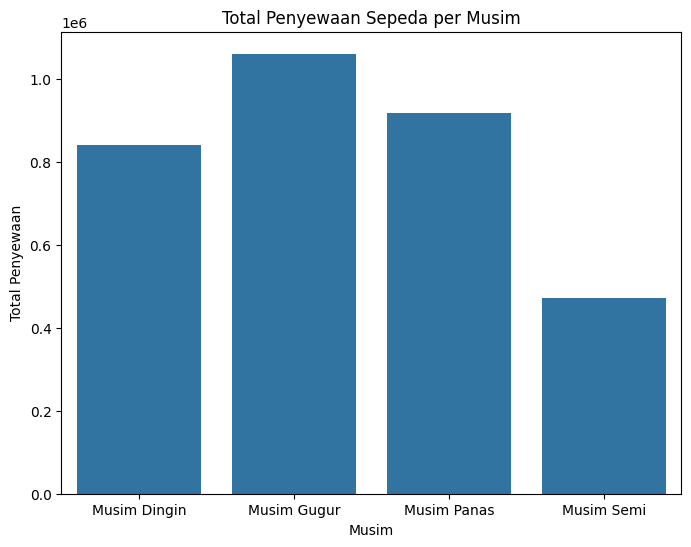

In [86]:
day_df['season'] = day_df['season'].replace({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
})

# Hitung total penyewaan per musim
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Buat bar chart
plt.figure(figsize=(8, 6))  # Sesuaikan ukuran gambar
sns.barplot(x='season', y='cnt', data=seasonal_rentals)
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')  # Perbaikan: Ganti 'Season' dengan 'Musim'
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2: Apakah ada korelasi yang jelas antara suhu dan jumlah penyewa sepeda? Jika ada, apakah korelasinya positif atau negatif?

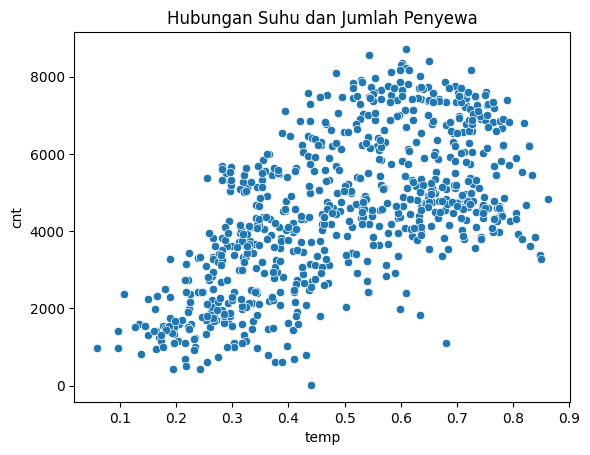

In [76]:
# Visualisasi hubungan antara suhu dan jumlah penyewa
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Jumlah Penyewa')
plt.show()

## Analisis Lanjutan (Opsional)

Clustering dengan manual grouping

Kelompok 1: Hari Kerja Musim Panas/Gugur dengan Cuaca Cerah
season = 2 atau 3
workingday = 1
weathersit = 1
temp > 0.6 (suhu relatif tinggi)

Kelompok 2: Akhir Pekan Musim Semi/Dingin dengan Cuaca Buruk
season = 1 atau 4
workingday = 0
weathersit > 1 (berkabut atau hujan)
temp < 0.5 (suhu relatif rendah)

Kelompok 3: Hari Kerja Musim Semi/Dingin dengan Cuaca Cerah
season = 1 atau 4
workingday = 1
weathersit = 1
temp > 0.5

Kelompok 4: Akhir Pekan Musim Panas/Gugur dengan Cuaca Cerah
season = 2 atau 3
workingday = 0
weathersit = 1
temp > 0.6

Kelompok 5: Hari dengan Cuaca Buruk
weathersit > 1

 Implementasi di Python (Pandas)

In [77]:
import pandas as pd

def manual_grouping(row):
    if (row['season'] in [2, 3] and row['weekday'] in range(1, 6) and
        row['workingday'] == 1 and row['weathersit'] == 1 and row['temp'] > 0.6):
        return 'Hari Kerja Musim Panas'
    elif (row['season'] in [2, 3] and row['weekday'] in [0, 6] and
          row['workingday'] == 0 and row['weathersit'] == 1 and row['temp'] > 0.6):
        return 'Akhir Pekan Musim Panas'
    elif (row['season'] in [1, 4] and row['weekday'] in range(1, 6) and
          row['workingday'] == 1 and row['weathersit'] in [2, 3, 4] and row['temp'] < 0.4):
        return 'Hari Kerja Musim Dingin'
    elif (row['season'] in [1, 4] and row['weekday'] in [0, 6] and
          row['workingday'] == 0 and row['weathersit'] in [2, 3, 4] and row['temp'] < 0.4):
        return 'Akhir Pekan Musim Dingin'
    else:
        return 'Lainnya'

day_df['manual_cluster'] = day_df.apply(manual_grouping, axis=1)

# Analisis jumlah penyewaan per cluster
cluster_analysis = day_df.groupby('manual_cluster')['cnt'].agg(['mean', 'median', 'count'])
print(cluster_analysis)

                                 mean  median  count
manual_cluster                                      
Akhir Pekan Musim Dingin  2469.304348  2169.0     23
Akhir Pekan Musim Panas   5750.038462  5343.5     52
Hari Kerja Musim Dingin   2883.600000  2802.0     65
Hari Kerja Musim Panas    5823.826446  5515.0    121
Lainnya                   4350.565957  4274.0    470


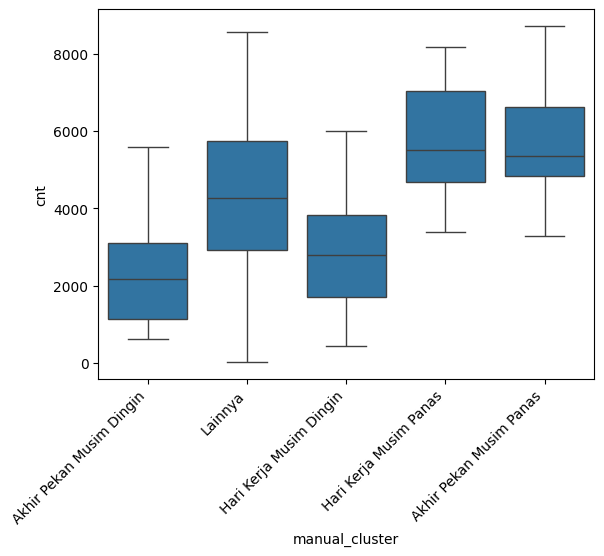

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='manual_cluster', y='cnt', data=day_df)
plt.xticks(rotation=45, ha='right')
plt.show()

Kode ini bertujuan untuk melakukan *manual grouping* (*clustering*) berdasarkan kombinasi fitur-fitur yang relevan, kemudian menganalisis jumlah penyewaan (cnt) di setiap kelompok yang dibuat. Tujuan spesifiknya adalah:

1. Membuat Kelompok (Cluster) Manual:

Mengelompokkan data harian berdasarkan musim, hari dalam seminggu, apakah hari kerja, kondisi cuaca, dan suhu.
Membuat kelompok yang berbeda untuk hari kerja dan akhir pekan di musim panas dan musim dingin, serta memisahkan hari-hari dengan cuaca buruk.

2. Menganalisis Jumlah Penyewaan per Kelompok:

Menghitung rata-rata (mean), median (median), dan jumlah hari (count) penyewaan untuk setiap kelompok yang terbentuk.
Memahami bagaimana jumlah penyewaan bervariasi di antara kelompok-kelompok yang berbeda.

**Insight:**

*   Optimasi Operasional: Perusahaan penyewaan sepeda dapat menggunakan informasi ini untuk mengoptimalkan inventaris dan staf mereka berdasarkan pola permintaan yang berbeda di berbagai musim dan hari dalam seminggu.

*   Strategi Pemasaran: Mereka dapat menyesuaikan strategi pemasaran mereka untuk menargetkan segmen pengguna yang berbeda pada waktu yang berbeda.

*   Perencanaan Infrastruktur: Informasi ini dapat membantu dalam perencanaan infrastruktur sepeda, seperti penambahan stasiun penyewaan atau jalur sepeda di area dengan permintaan tinggi.

## Conclusion

- Conclution pertanyaan 1

Stabilitas Musim: Jumlah penyewa sepeda cenderung stabil di setiap musim. Ini menunjukkan bahwa faktor musim mungkin tidak menjadi faktor dominan dalam menentukan jumlah penyewa sepeda.

Tidak Ada Musim Puncak yang Signifikan: Tidak ada satu musim pun yang secara signifikan memiliki jumlah penyewa lebih tinggi dibandingkan musim lainnya. Ini mengindikasikan bahwa penggunaan sepeda mungkin lebih dipengaruhi oleh faktor-faktor lain seperti cuaca harian, hari dalam seminggu, atau acara khusus.


- Conclution pertanyaan 2

Korelasi Positif: Terlihat adanya kecenderungan bahwa semakin tinggi suhu, semakin banyak jumlah penyewa sepeda. Ini mengindikasikan bahwa cuaca yang hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda.

Variabilitas: Meskipun ada tren positif, masih banyak titik data yang tersebar dan tidak sepenuhnya mengikuti garis tren yang jelas. Ini menunjukkan bahwa suhu bukanlah satu-satunya faktor yang mempengaruhi jumlah penyewa.

Outliers: Ada beberapa titik data yang berada jauh dari kelompok data lainnya. Titik-titik ini mungkin mewakili kondisi yang unik, seperti acara khusus atau perubahan cuaca yang ekstrem.